<a href="https://colab.research.google.com/github/MAHESHYADAWAD/Indian-Startup-Funding-Analysis/blob/main/ISFA_BY_MAHI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


#set style
sns.set(style="whitegrid")

In [ ]:
def readcsv(filepath,filename):
  import os
  os.chdir(filepath)
  file=pd.read_excel(filename)

  return file

filepath="/content/drive/MyDrive/klebcagk"
filename="startup_funding138.xlsx"

df=readcsv(filepath,filename)
#print(df.head(3))

In [ ]:
print(pd.DataFrame(df.head(3)))

   SNo                 Date   StartupName  Industry_Vertical  \
0    0  2017-01-08 00:00:00      TouchKin         Technology   
1    1  2017-02-08 00:00:00       Ethinos         Technology   
2    2  2017-02-08 00:00:00  Leverage Edu  Consumer Internet   

                                     SubVertical City_Location  \
0                       Predictive Care Platform     Bangalore   
1                       Digital Marketing Agency        Mumbai   
2  Online platform for Higher Education Services     New Delhi   

                                      Investors_Name  InvestmentType  \
0                                        Kae Capital  Private Equity   
1                         Triton Investment Advisors  Private Equity   
2  Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...    Seed Funding   

   Amount_In_INR Remarks  
0      1300000.0     NaN  
1            NaN     NaN  
2            NaN     NaN  


In [ ]:
#inspect first few rows
print("forst 5 rows:")
print(df.head())

#basic info
print("basic info:")
print(df.info())

#check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

forst 5 rows:
   SNo                 Date   StartupName  Industry_Vertical  \
0    0  2017-01-08 00:00:00      TouchKin         Technology   
1    1  2017-02-08 00:00:00       Ethinos         Technology   
2    2  2017-02-08 00:00:00  Leverage Edu  Consumer Internet   
3    3  2017-02-08 00:00:00          Zepo  Consumer Internet   
4    4  2017-02-08 00:00:00  Click2Clinic  Consumer Internet   

                                     SubVertical City_Location  \
0                       Predictive Care Platform     Bangalore   
1                       Digital Marketing Agency        Mumbai   
2  Online platform for Higher Education Services     New Delhi   
3                         DIY Ecommerce platform        Mumbai   
4                  healthcare service aggregator     Hyderabad   

                                      Investors_Name  InvestmentType  \
0                                        Kae Capital  Private Equity   
1                         Triton Investment Advisors  Privat

In [ ]:
#fill missing values
df['Industry_Vertical']=df['Industry_Vertical'].fillna('others')
df['SubVertical']=df['SubVertical'].fillna('not specified')
df['City_Location']=df['City_Location'].fillna('not specified')
df['Investors_Name']=df['Investors_Name'].fillna('not specified')


In [ ]:
#convert date column to datetime and extract year/month
df['Date']=pd.to_datetime(df['Date'],errors='coerce')
df['year']=df['Date'].dt.year
df['month']=df['Date'].dt.month

In [ ]:
df.columns


Index(['SNo', 'Date', 'StartupName', 'Industry_Vertical', 'SubVertical',
       'City_Location', 'Investors_Name', 'InvestmentType', 'Amount_In_INR',
       'Remarks', 'year', 'month'],
      dtype='object')

In [ ]:
#apply the function to the amount column
df['Amount_In_INR']=df['Amount_In_INR'].fillna(df['Amount_In_INR'].median())

In [ ]:
#save cleaned data
df.to_csv('cleaned_startup_funding.csv',index=False)

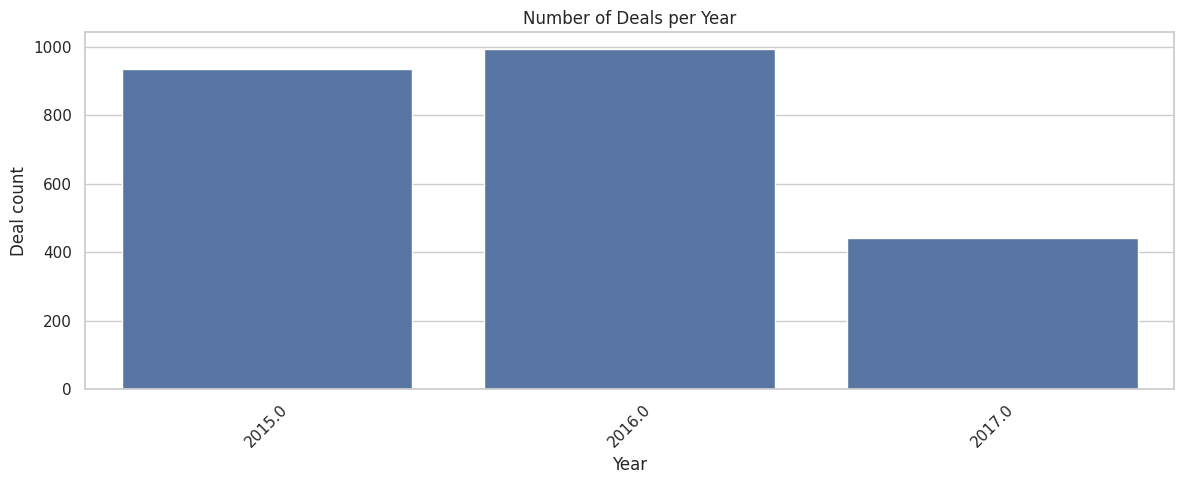

In [ ]:
#number of deals per year
plt.figure(figsize=(12,5))
sns.countplot(x='year',data=df)
plt.title('Number of Deals per Year')
plt.xlabel('Year')
plt.ylabel('Deal count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

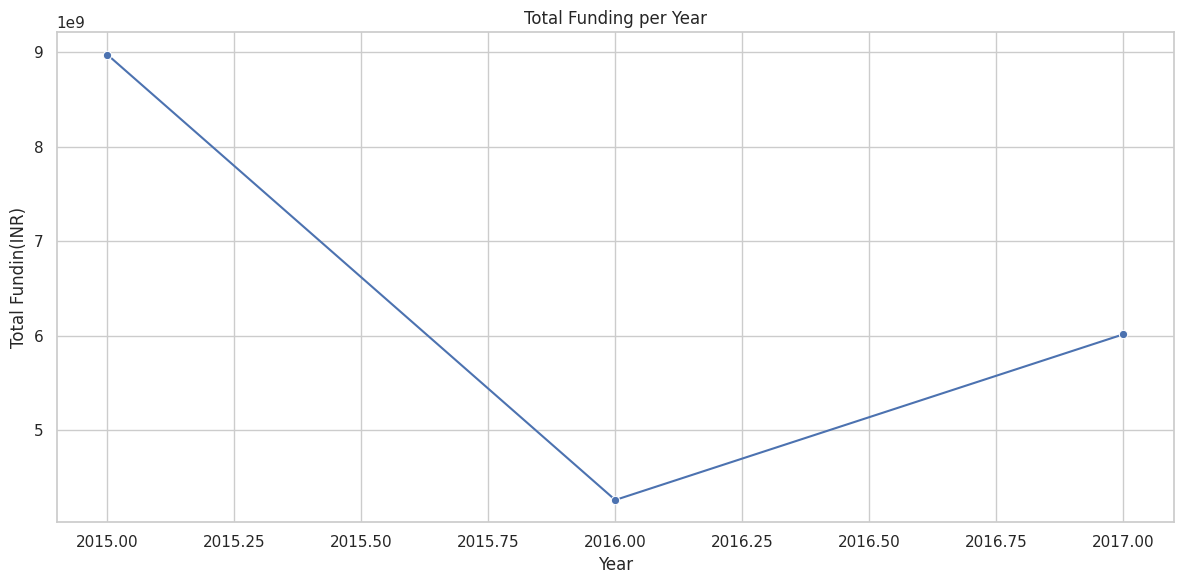

In [ ]:
#total funding per year
yearly_funding=df.groupby('year')['Amount_In_INR'].sum().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(x='year',y='Amount_In_INR',data=yearly_funding,marker='o')
plt.title('Total Funding per Year')
plt.xlabel('Year')
plt.ylabel('Total Fundin(INR)')
plt.grid(True)
plt.tight_layout()
plt.show()

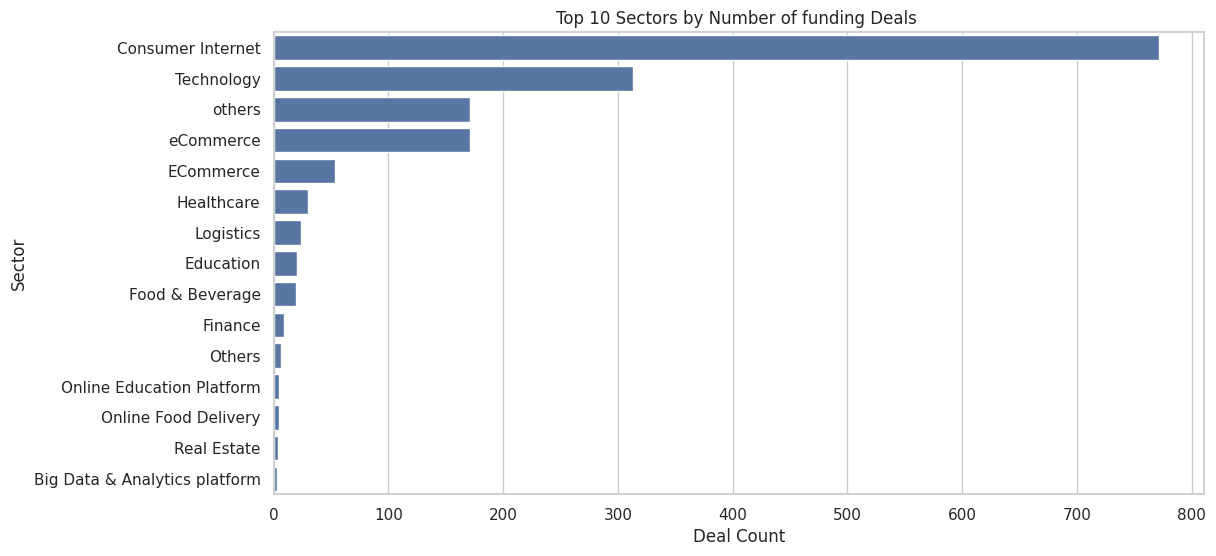

In [ ]:
#top sectors by deal count
top_sectors=df['Industry_Vertical'].value_counts().head(15)
plt.figure(figsize=(12,6))
sns.barplot(x=top_sectors.values,y=top_sectors.index)
plt.title('Top 10 Sectors by Number of funding Deals ')
plt.xlabel('Deal Count')
plt.ylabel('Sector')
plt.show()

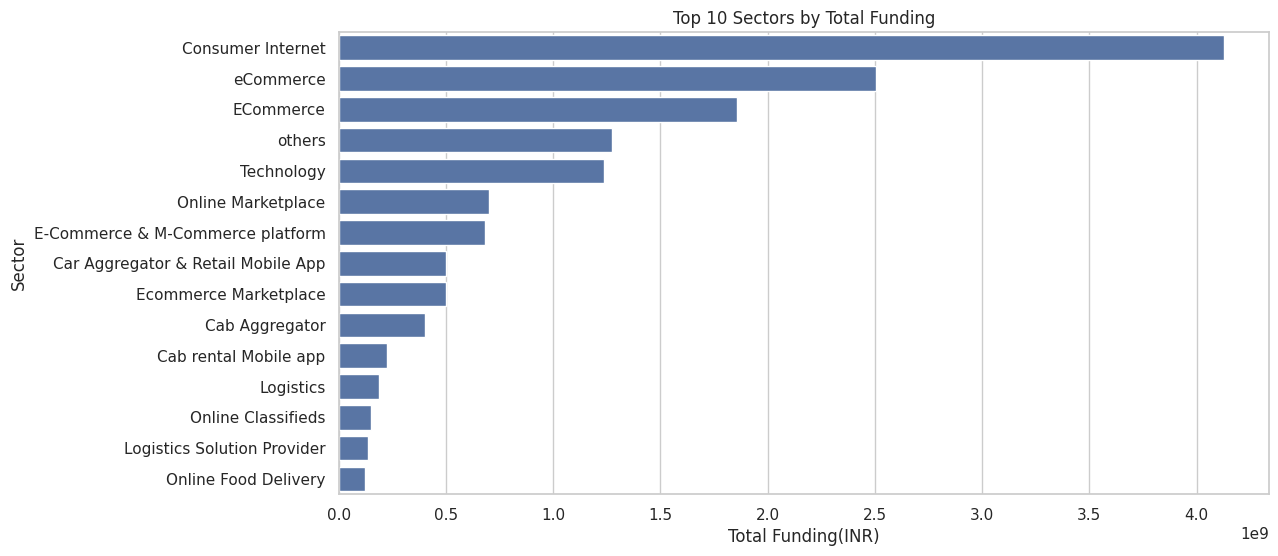

In [ ]:
#top sectors by total funding
df['Industry_Vertical']=df['Industry_Vertical'].replace({'E-Commerce':'Ecommerce'})
sectors_funding=df.groupby('Industry_Vertical')['Amount_In_INR'].sum().sort_values(ascending=False).head(15)
plt.figure(figsize=(12,6))
sns.barplot(x=sectors_funding.values,y=sectors_funding.index)
plt.title('Top 10 Sectors by Total Funding')
plt.xlabel('Total Funding(INR)')
plt.ylabel('Sector')
plt.show()

In [ ]:
#split multiple investors and count
investors_df=df[['Investors_Name','Amount_In_INR']].copy()
investors_df['Investors_Name']=investors_df['Investors_Name'].str.split(',')
investors_df=investors_df.explode('Investors_Name').dropna()
investors_df['Investors_Name']=investors_df['Investors_Name'].str.strip().str.title()

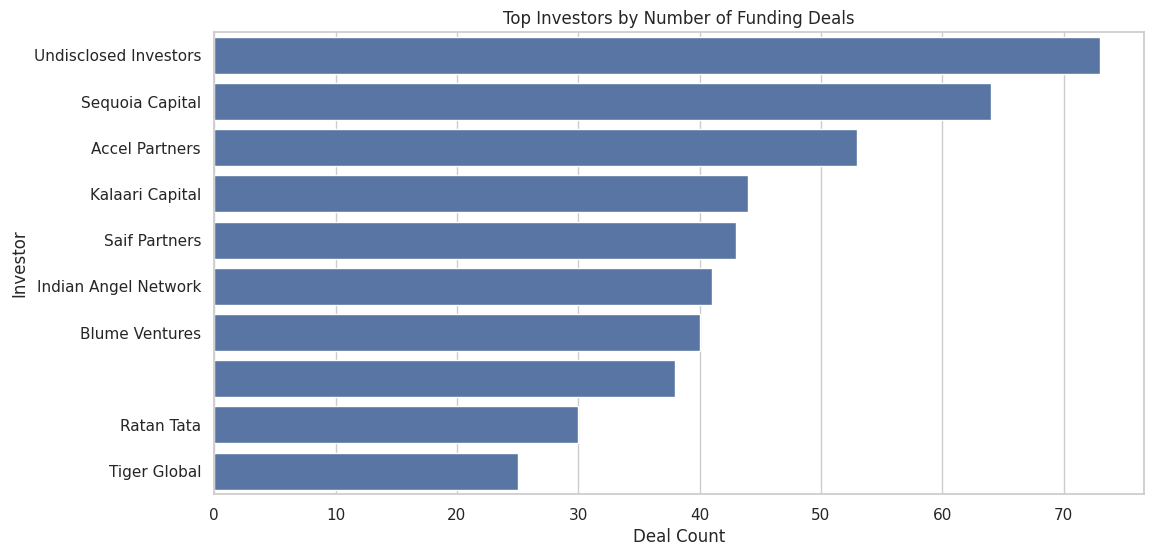

In [ ]:
#top investors by number of deals
top_investors_deals=investors_df['Investors_Name'].value_counts().head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=top_investors_deals.values,y=top_investors_deals.index)
plt.title('Top Investors by Number of Funding Deals')
plt.xlabel('Deal Count')
plt.ylabel('Investor')
plt.show()

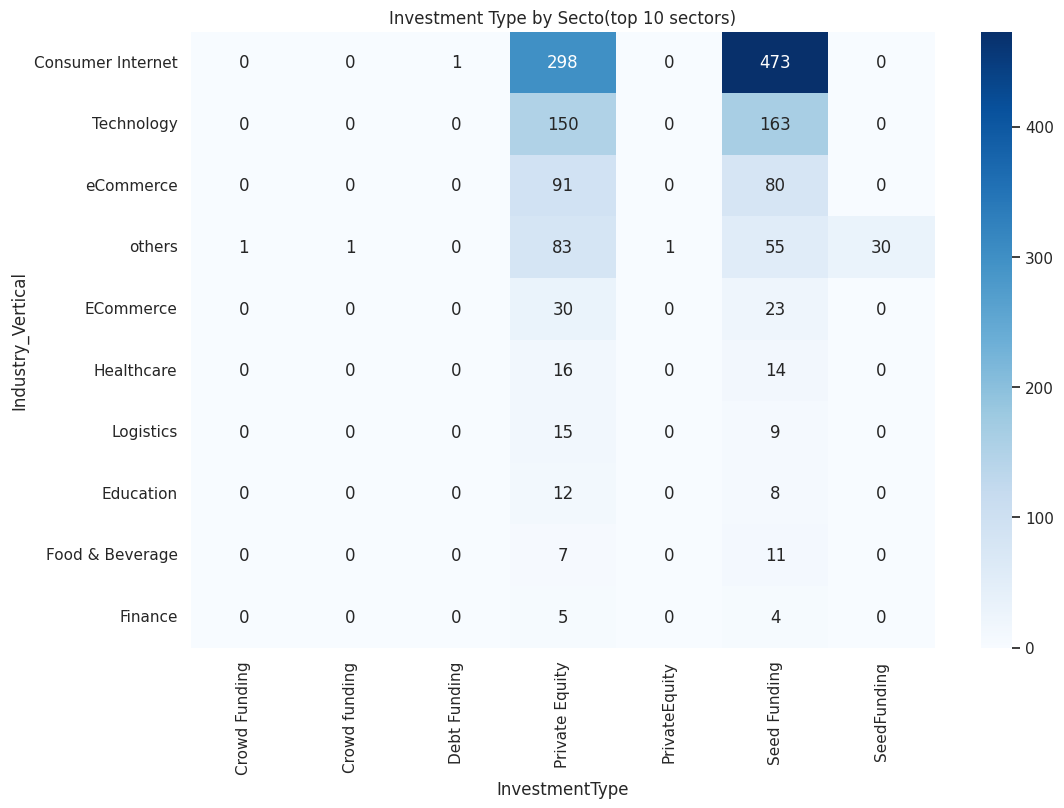

In [ ]:
sector_stage=pd.crosstab(df['Industry_Vertical'],df['InvestmentType'])
sector_stage=sector_stage.loc[sector_stage.sum(axis=1).sort_values(ascending=False).head(10).index]
plt.figure(figsize=(12,8))
sns.heatmap(sector_stage,annot=True,fmt="d",cmap='Blues')
plt.title('Investment Type by Secto(top 10 sectors)')
plt.show()

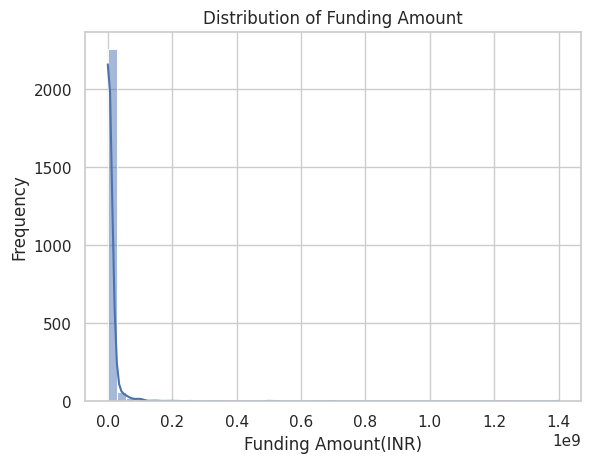

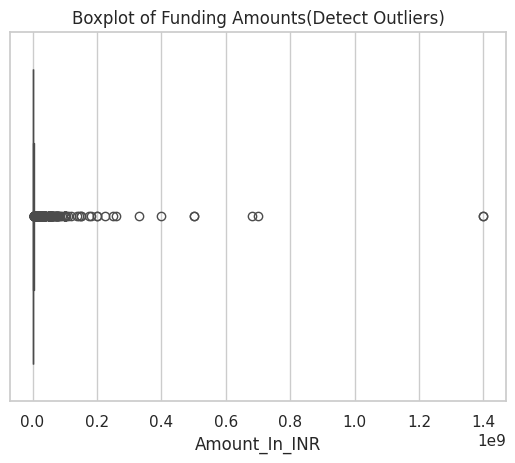

In [ ]:
sns.histplot(df['Amount_In_INR'],bins=50,kde=True)
plt.title('Distribution of Funding Amount')
plt.xlabel('Funding Amount(INR)')
plt.ylabel('Frequency')
plt.show()

sns.boxplot(x=df['Amount_In_INR'])
plt.title('Boxplot of Funding Amounts(Detect Outliers)')
plt.show()

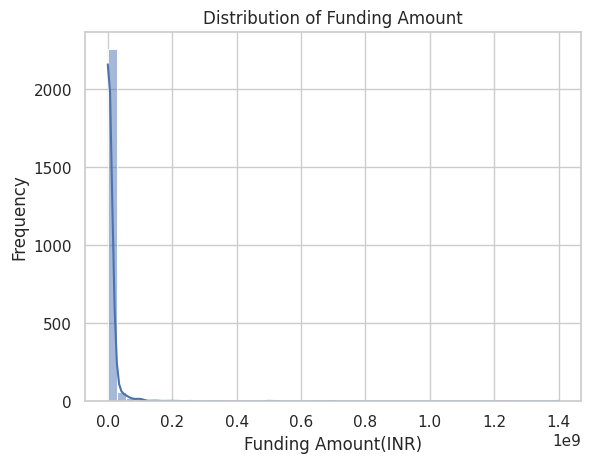

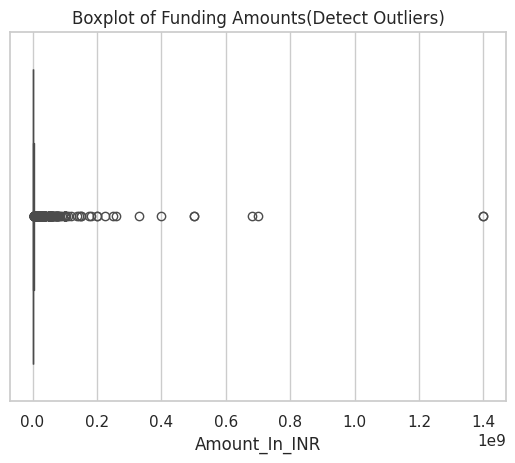

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Amount_In_INR'],bins=50,kde=True)
plt.title('Distribution of Funding Amount')
plt.xlabel('Funding Amount(INR)')
plt.ylabel('Frequency')
plt.show()

sns.boxplot(x=df['Amount_In_INR'])
plt.title('Boxplot of Funding Amounts(Detect Outliers)')
plt.show()

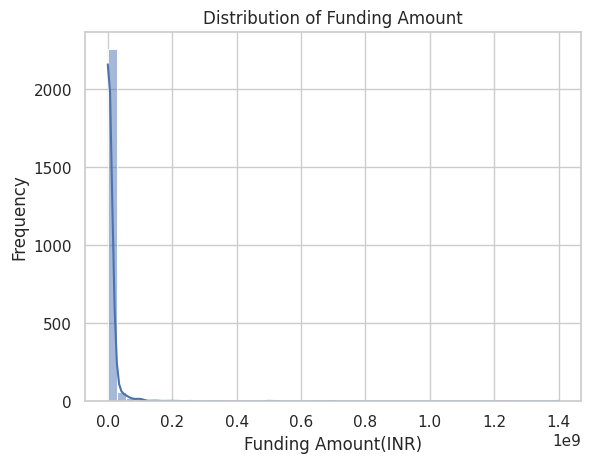

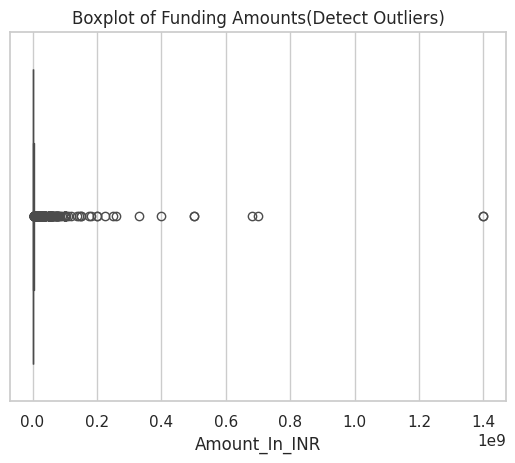

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#set style
sns.set(style="whitegrid")

def readcsv(filepath,filename):
  import os
  os.chdir(filepath)
  file=pd.read_excel(filename)
  return file

filepath="/content/drive/MyDrive/klebcagk"
filename="startup_funding138.xlsx"

df=readcsv(filepath,filename)

#fill missing values
df['Industry_Vertical']=df['Industry_Vertical'].fillna('others')
df['SubVertical']=df['SubVertical'].fillna('not specified')
df['City_Location']=df['City_Location'].fillna('not specified')
df['Investors_Name']=df['Investors_Name'].fillna('not specified')

#convert date column to datetime and extract year/month
df['Date']=pd.to_datetime(df['Date'],errors='coerce')
df['year']=df['Date'].dt.year
df['month']=df['Date'].dt.month

#apply the function to the amount column
df['Amount_In_INR']=df['Amount_In_INR'].fillna(df['Amount_In_INR'].median())

# Plotting code
sns.histplot(df['Amount_In_INR'],bins=50,kde=True)
plt.title('Distribution of Funding Amount')
plt.xlabel('Funding Amount(INR)')
plt.ylabel('Frequency')
plt.show()

sns.boxplot(x=df['Amount_In_INR'])
plt.title('Boxplot of Funding Amounts(Detect Outliers)')
plt.show()

In [ ]:
investors_df=df[['StartupName','Investors_Name','Amount_In_INR']].copy()
investors_df['Investors_Name']=investors_df['Investors_Name'].str.split(',')
investors_df=investors_df.explode('Investors_Name').dropna()
investors_df['Investors_Name']=investors_df['Investors_Name'].str.strip().str.title()

In [ ]:
def classify_investors(name):
  name=name.lower()
  if any(word in name for word in ['capital','ventures','partners','fund','vc','labs']):
    return 'VC'
  elif any(word in name for word in ['angel','network']):
      return 'Angel'
  elif any(word in name for word in ['corp','limited','pvt','ltd','inc']):
      return 'Corporate'
  else:
    return 'other'





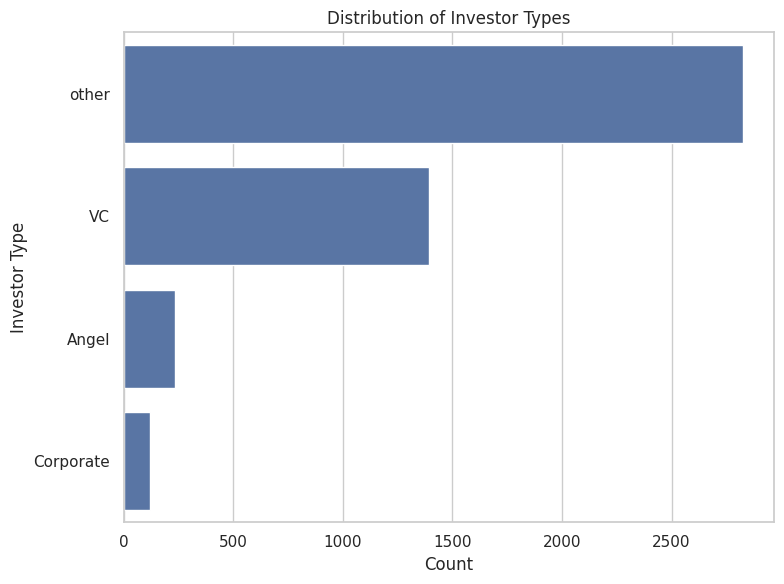

In [ ]:
investors_df['Investor_Type']=investors_df['Investors_Name'].apply(classify_investors)
Investor_Type_counts=investors_df['Investor_Type'].value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=Investor_Type_counts.values,y=Investor_Type_counts.index)
plt.title('Distribution of Investor Types')
plt.xlabel('Count')
plt.ylabel('Investor Type')
plt.tight_layout()
plt.show()

In [ ]:
#group by startup and year,time compute cumulative funding
startup_growth=df.groupby(['StartupName','year'])['Amount_In_INR'].sum().unstack().fillna(0).cumsum()


#select top 5 funded startups
top_startups=startup_growth.sum(axis=1).sort_values(ascending=False).head(5).index


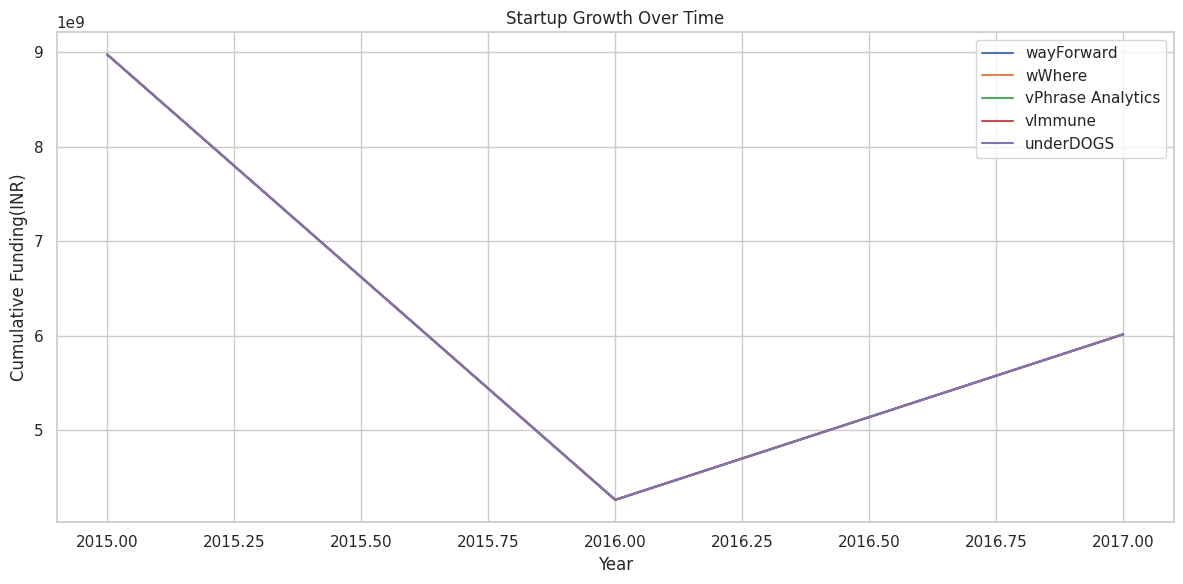

In [ ]:
plt.figure(figsize=(12,6))
for startups in top_startups:
  plt.plot(startup_growth.loc[startups].index,startup_growth.loc[startups].values,label=startups)
plt.title('Startup Growth Over Time')
plt.xlabel('Year')
plt.ylabel('Cumulative Funding(INR)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
investors_df=df[['StartupName','Investors_Name']].copy()
investors_df['Investors_Name']=investors_df['Investors_Name'].str.split(',')
investors_df=investors_df.explode('Investors_Name').dropna()
investors_df['Investors_Name']=investors_df['Investors_Name'].str.strip().str.title()

In [ ]:
#count how many times an investor investes un the same startups
investor_startup_count=investors_df.groupby(['Investors_Name','StartupName']).size().reset_index(name='DealCount')
repeat_investors=investor_startup_count[investor_startup_count['DealCount']>1]

repear_investors_summary=repeat_investors['Investors_Name'].value_counts().head(10)

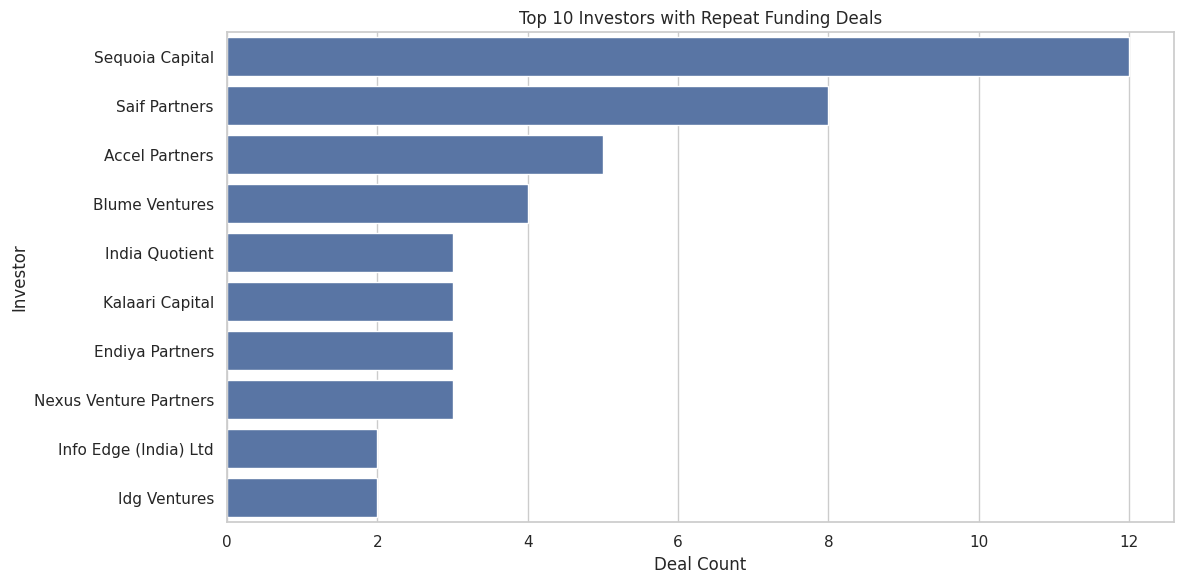

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x=repear_investors_summary.values,y=repear_investors_summary.index)
plt.title('Top 10 Investors with Repeat Funding Deals')
plt.xlabel('Deal Count')
plt.ylabel('Investor')
plt.tight_layout()
plt.show()

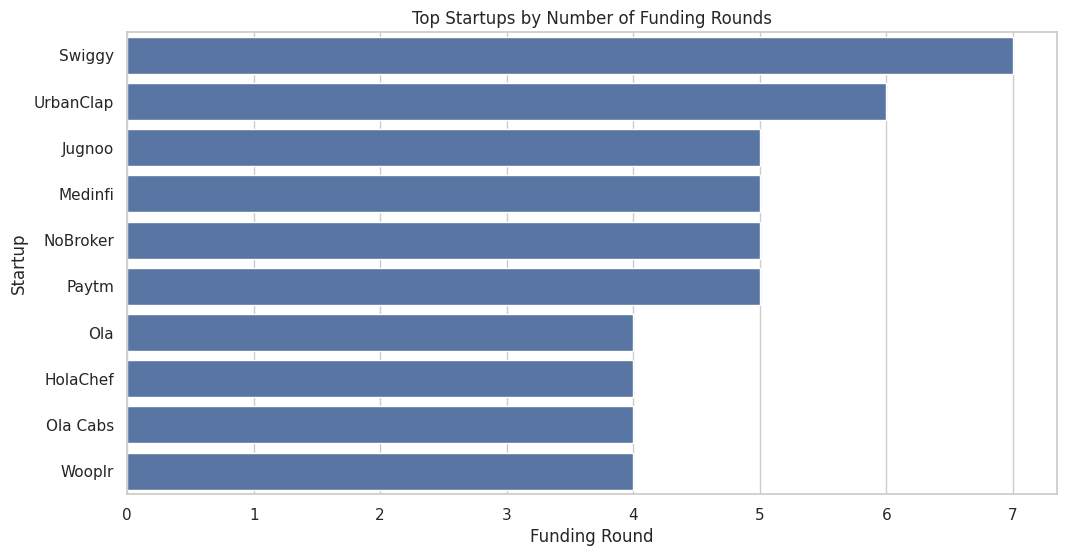

In [ ]:
startup_rounds = df.groupby('StartupName').size().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=startup_rounds.values, y=startup_rounds.index)
plt.title("Top Startups by Number of Funding Rounds")
plt.xlabel("Funding Round")
plt.ylabel("Startup")
plt.show()

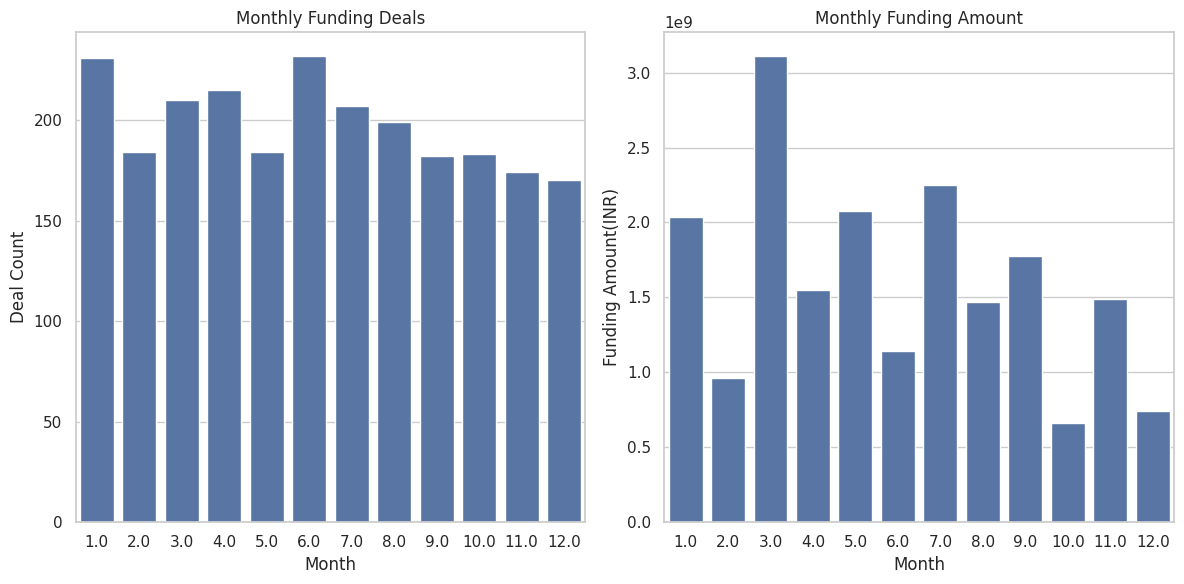

In [ ]:
df['Month']=df['Date'].dt.month
monthly_deals=df['Month'].value_counts().sort_index()
monthly_funding=df.groupby('Month')['Amount_In_INR'].sum()

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.barplot(x=monthly_deals.index,y=monthly_deals.values,ax=ax[0])
ax[0].set_title('Monthly Funding Deals')
ax[0].set_xlabel('Month')
ax[0].set_ylabel('Deal Count')


sns.barplot(x=monthly_funding.index,y=monthly_funding.values,ax=ax[1])
ax[1].set_title('Monthly Funding Amount')
ax[1].set_xlabel('Month')
ax[1].set_ylabel('Funding Amount(INR)')
plt.tight_layout()
plt.show()

In [ ]:
def readcsv(filepath,filename):
  import os
  os.chdir(filepath)
  file=pd.read_excel(filename)
  return file

filepath="/content/drive/MyDrive/klebcagk"
filename="startup_funding138.xlsx"

df1=readcsv(filepath,filename)

Undisclosed deals: 847
Disclosed deals: 1525


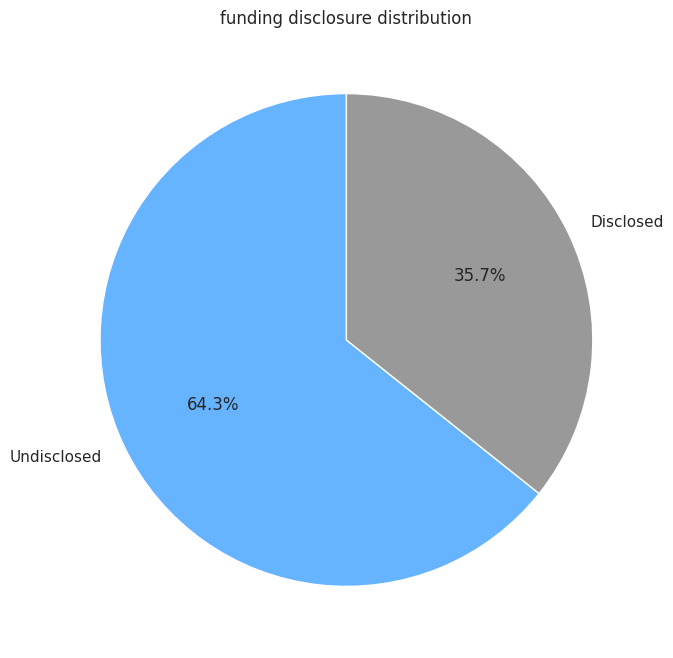

In [ ]:
undisclosed_deals=df1[df1['Amount_In_INR'].isna()]
disclosed_deals=df1[df1['Amount_In_INR'].notna()]
print(f"Undisclosed deals: {len(undisclosed_deals)}")
print(f"Disclosed deals: {len(disclosed_deals)}")

labels=['Undisclosed','Disclosed']
sizes=[len(disclosed_deals),len(undisclosed_deals)]
plt.figure(figsize=(8,8))
plt.pie(sizes,labels=labels,autopct='%1.1f%%',startangle=90,colors=['#66b3ff','#999999'])
plt.title('funding disclosure distribution')
plt.show()